### In this notebook I want to explain how to work the binary classifier. First I want to show the Perceptron diagram. 


In [2]:
from idlelib.iomenu import errors

# import libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


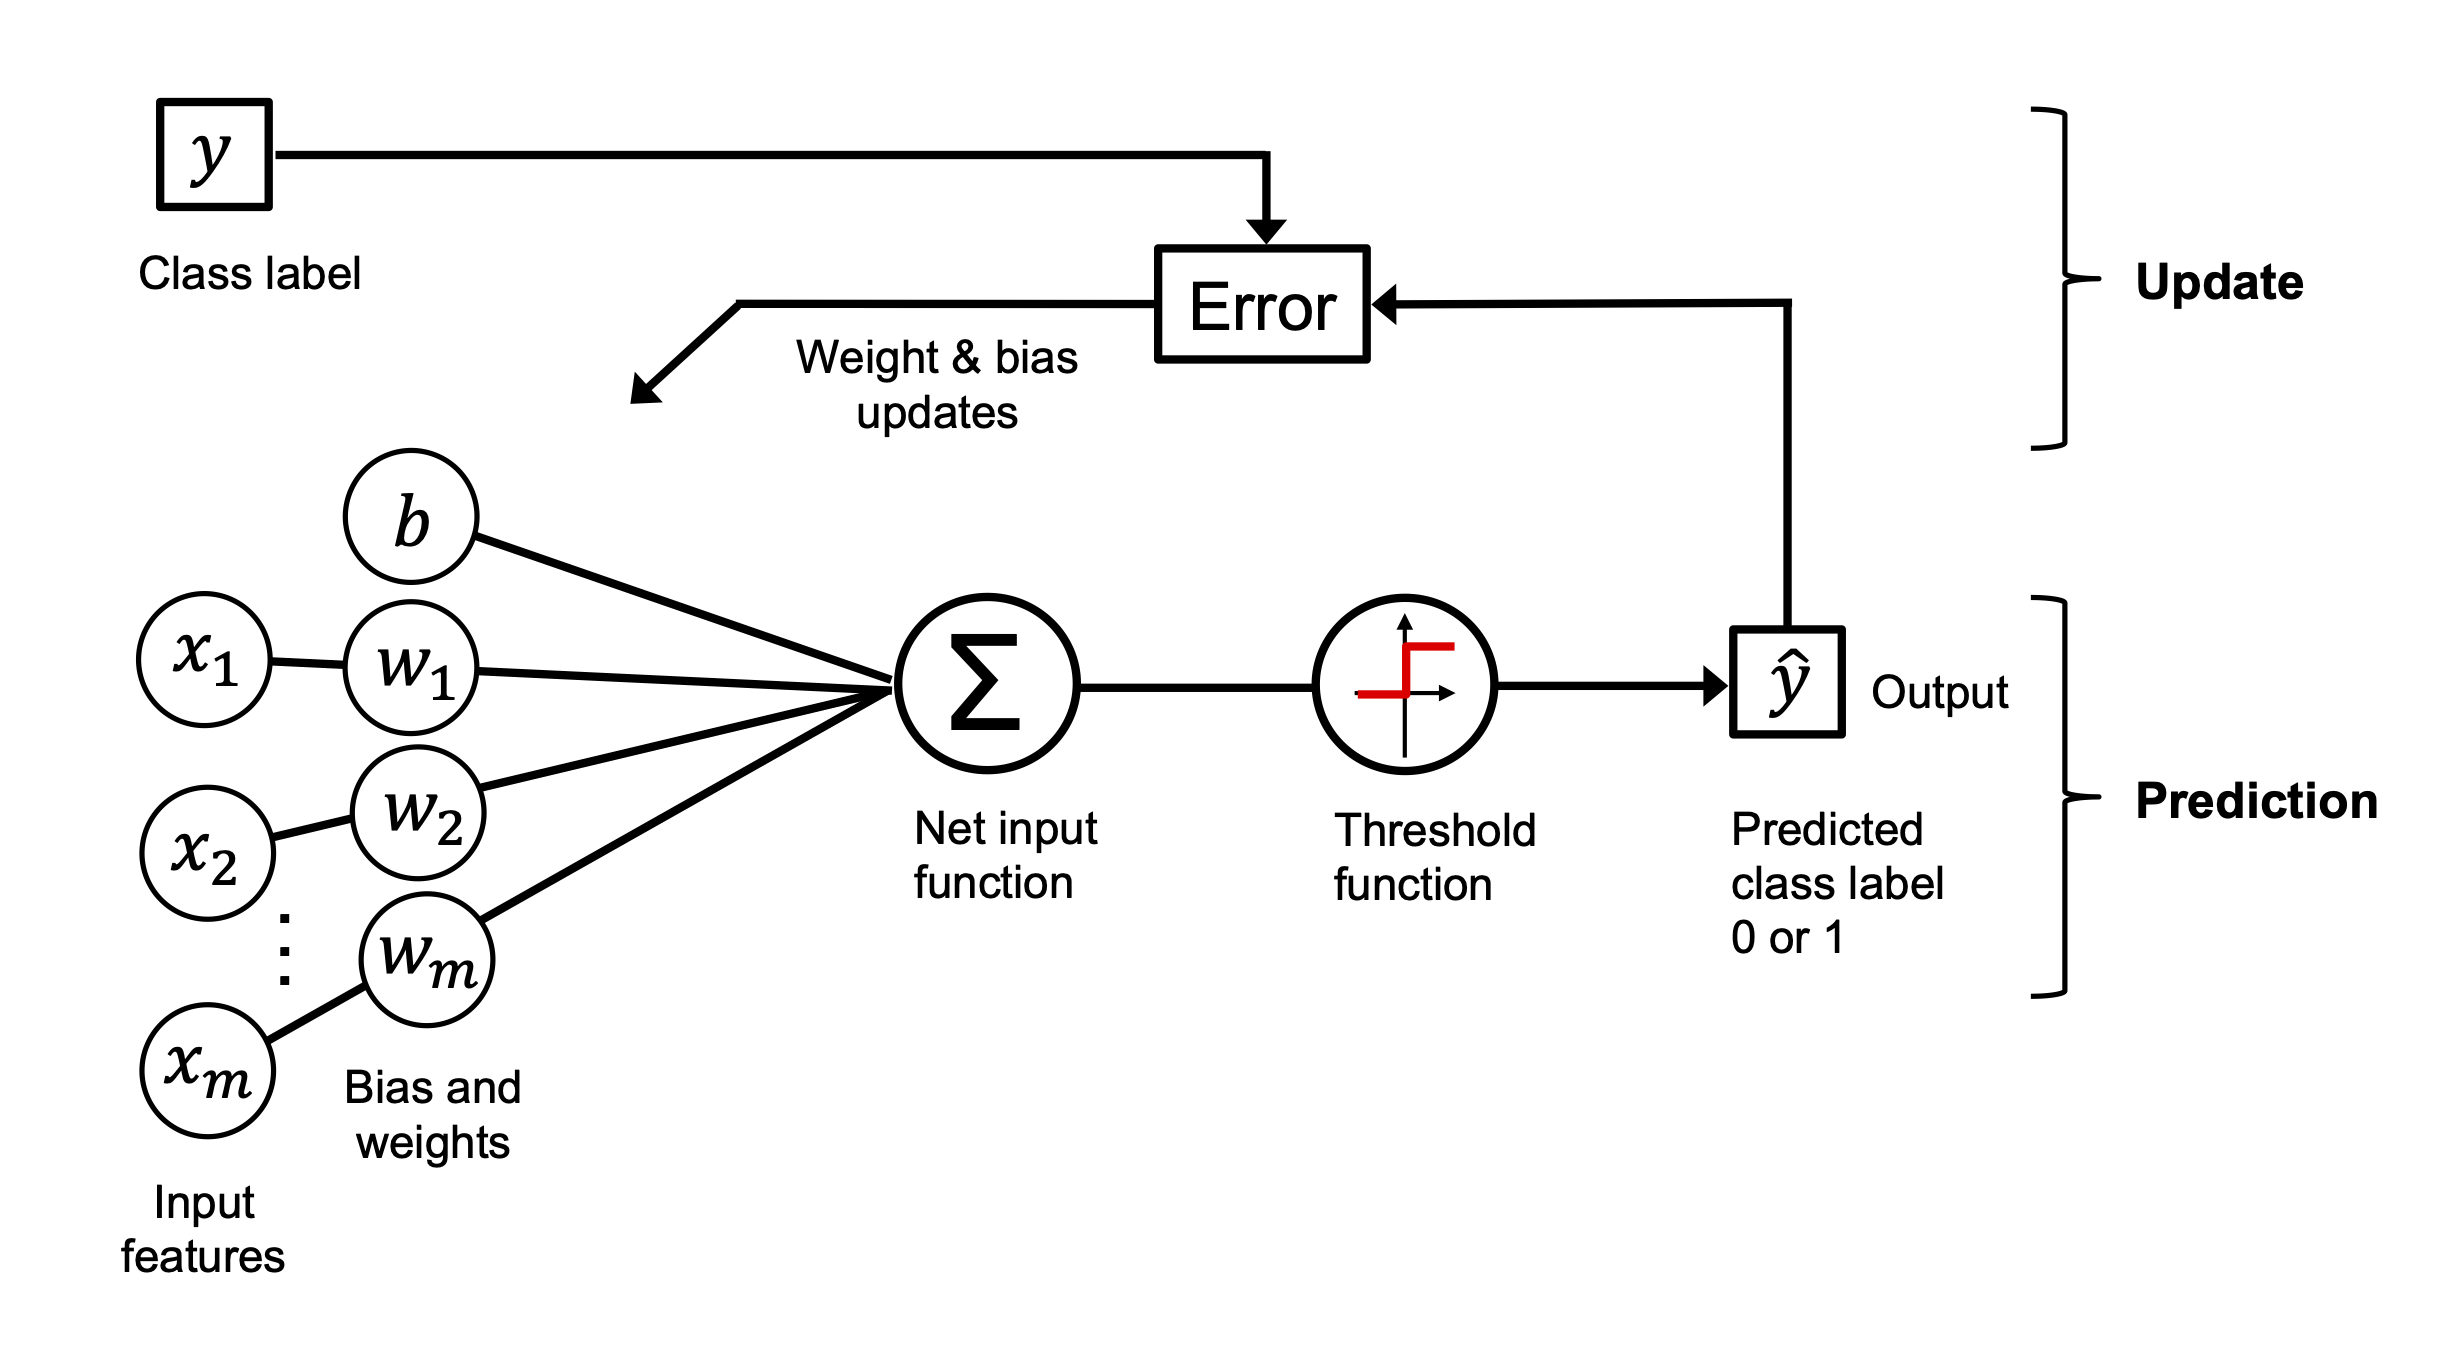

In [3]:
from IPython.display import Image
Image(filename="02_04.png", width=600)

In [4]:
#Perceptron for scratch to classify binary.
class Perceptron:
    def __init__(self, eta = 0.01, n_inter =50, random_state = 1):
        self.eta = eta
        self.random_state = random_state
        self.n_inter = n_inter
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_inter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        
        
        
    

In [4]:
from urllib.error import HTTPError

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    df = pd.read_csv(s,header=None,encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,header=None,encoding='utf-8')
    
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


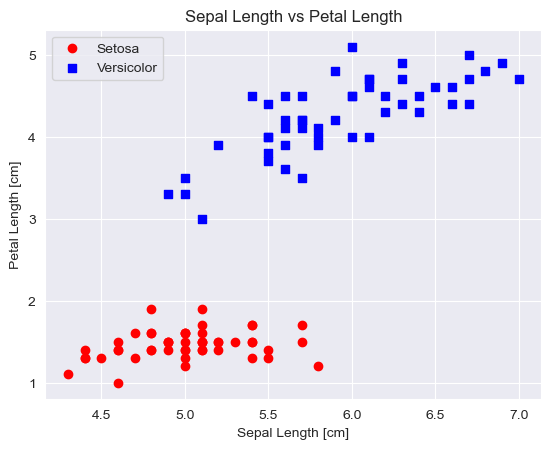

In [5]:
#select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
#extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# plot
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker='o', label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker='s', label="Versicolor")
plt.xlabel("Sepal Length [cm]")
plt.ylabel("Petal Length [cm]")
plt.title("Sepal Length vs Petal Length")
plt.legend(loc="upper left")
plt.show()

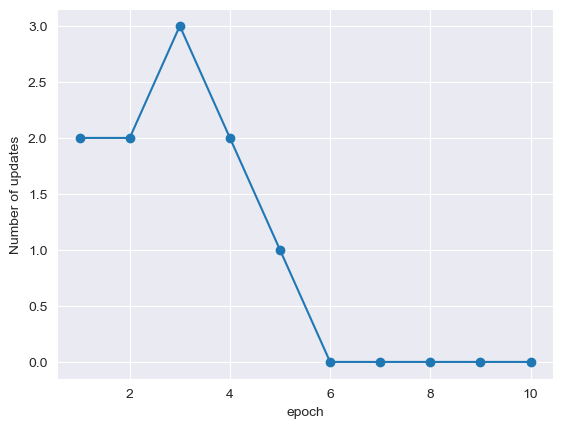

In [6]:
# create an instance the Perceptron class
ppn = Perceptron(eta = 0.50, n_inter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("epoch")
plt.ylabel("Number of updates")
plt.show()

In [6]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

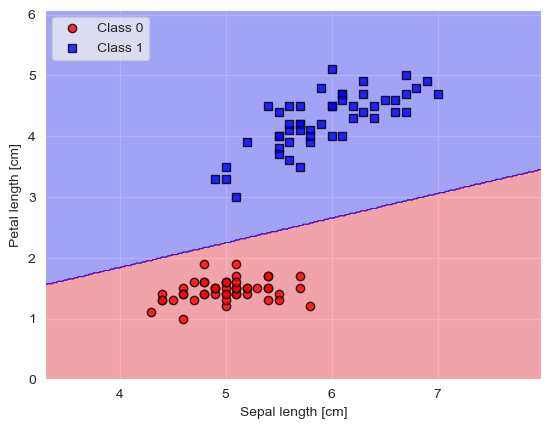

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

### Now  I going to implement the Adeline classifier. 


In [8]:
#AdalineGD. 
class AdalineGD:
    def __init__(self, eta = 0.01, n_inter =50, random_state = 1):
        self.eta = eta
        self.random_state = random_state
        self.n_inter = n_inter
    
   
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_inter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        
   

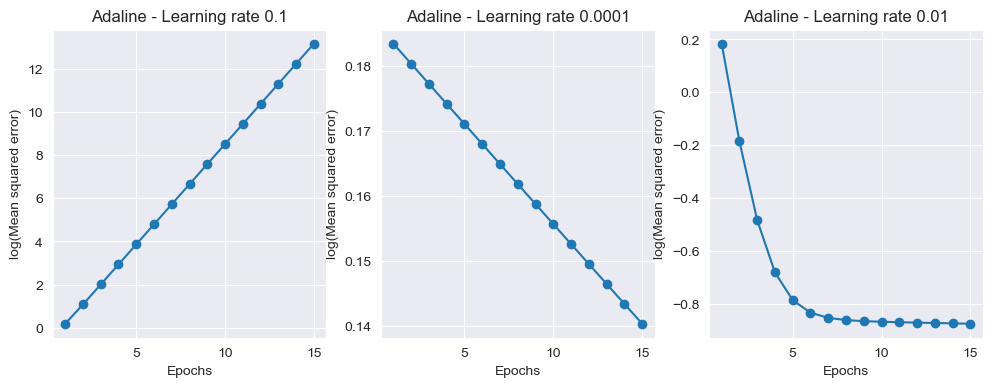

In [9]:
# how to work the different values of Learning rate. 
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))
ada1 = AdalineGD(eta = 0.1, n_inter = 15).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(eta = 0.0001, n_inter =15).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), np.log10(ada2.losses_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean squared error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
ada3 = AdalineGD(eta = 0.01, n_inter =15).fit(X, y)
ax[2].plot(range(1, len(ada3.losses_) + 1), np.log10(ada3.losses_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('log(Mean squared error)')
ax[2].set_title('Adaline - Learning rate 0.01')
plt.show()

Using skit-learn...

In [10]:
#Loading data
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target


In [12]:
#split datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


In [13]:
#standarized the datasets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
#Import perceptron
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)


Perceptron(eta0=0.1, random_state=1)

In [15]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [16]:
#accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)) # measure the accuracy_score
print(ppn.score(X_test_std, y_test)) # score

0.9777777777777777
0.9777777777777777


In [17]:
# create a grafic visualitazion where a see the 3 decesions_regions. 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=f'Class {cl}',edgecolor='black')
        
    if test_idx:
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', marker='o', label='Test set', alpha=1.0,edgecolor='black', linewidth=1, s=100,)
        


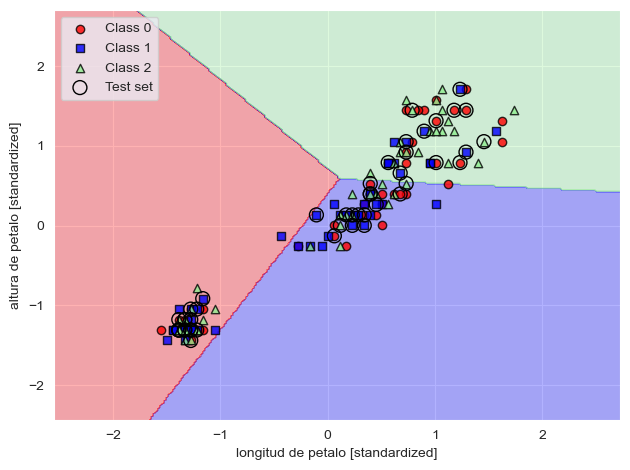

In [18]:
X_combined_std = np.vstack((X_test_std, X_train_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('longitud de petalo [standardized]')
plt.ylabel('altura de petalo [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()